In [48]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from imblearn.over_sampling import SMOTE

In [50]:
train_data = pd.read_csv('/content/drive/MyDrive/anyas-gojo-revival-bondman/trainData.csv')
test_data = pd.read_csv('/content/drive/MyDrive/anyas-gojo-revival-bondman/testData.csv')

In [51]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523174 entries, 0 to 523173
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     523174 non-null  int64  
 1   trans_date_trans_time  523174 non-null  object 
 2   cc_num                 523174 non-null  int64  
 3   merchant               523174 non-null  object 
 4   category               523174 non-null  object 
 5   amt                    523174 non-null  float64
 6   first                  523174 non-null  object 
 7   last                   523174 non-null  object 
 8   gender                 523174 non-null  object 
 9   street                 523174 non-null  object 
 10  city                   523174 non-null  object 
 11  state                  523174 non-null  object 
 12  zip                    523174 non-null  int64  
 13  lat                    523174 non-null  float64
 14  long                   523174 non-nu

NO NULL VALUES
SOME DATATYPE VARIATIONS NEED TO BE HANDLED

In [52]:
pd.set_option('display.max_columns', None)
train_data.head()

,id,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,1,2019-12-15 10:35:10,3597926034019603,fraud_Ruecker Group,misc_net,7.19,Derrick,Flores,M,83690 Nicholas Ports Apt. 846,Oakland,TN,38060,35.2229,-89.5518,9496,Furniture conservator/restorer,1993-03-23,2642fec2e19c9e18e61fe9a88f6bc79a,1355567710,35.189455,-90.121666,0
1,2,2019-04-10 21:49:53,4873783502705038,fraud_Lynch Ltd,shopping_pos,6.32,Elizabeth,Maxwell,F,194 Goodman Fall Apt. 569,Burlington,WA,98233,48.4786,-122.3345,14871,Public house manager,1974-03-10,61cec15bdbd3db31b12f886e8e181380,1334094593,49.004316,-122.745016,0
2,3,2020-02-16 10:56:18,213161869125933,fraud_Bauch-Raynor,grocery_pos,147.59,Monica,Lane,F,3270 Scott Islands,East Andover,ME,4226,44.6084,-70.6993,190,Animal nutritionist,1970-04-17,c8fcf575540e37ce0822cd040148ff57,1361012178,44.455449,-70.809148,0
3,4,2020-04-30 16:14:16,374656033243756,"fraud_Effertz, Welch and Schowalter",entertainment,32.40,David,Lewis,M,1499 Michael Rue,Arlington,VA,22213,38.8954,-77.1633,207410,Mudlogger,1984-07-03,9e9cde0e0963ac746a2cc9938e171c9a,1367338456,39.476941,-77.613438,0
4,5,2019-12-05 21:07:59,6011999606625827,fraud_Wilkinson LLC,personal_care,29.79,Ronald,Carson,M,870 Rocha Drive,Harrington Park,NJ,7640,40.9918,-73.9800,4664,"Radiographer, diagnostic",1965-06-30,0742473d7f6261ce366b43ece063faf3,1354741679,40.863808,-74.674018,0


In [53]:
pd.set_option('display.max_rows', None)
data = train_data.category[train_data.is_fraud == 1].value_counts()
total_frauds = 0
for x in data:
  total_frauds += x

for i,x in enumerate(data):
  data[i] = round(x / total_frauds*100)

print(data)
test_data.category.value_counts()

grocery_pos       23
shopping_net      23
misc_net          12
shopping_pos      11
gas_transport      8
misc_pos           3
kids_pets          3
entertainment      3
personal_care      3
home               3
food_dining        2
grocery_net        2
health_fitness     2
travel             2
Name: category, dtype: int64


gas_transport     56370
grocery_pos       52553
home              52345
shopping_pos      49791
kids_pets         48692
shopping_net      41779
entertainment     40104
personal_care     39327
food_dining       39268
health_fitness    36674
misc_pos          34574
misc_net          27367
grocery_net       19426
travel            17449
Name: category, dtype: int64

from above exploaration we can find that using Mean Encoding would be a good option
APPLYING THE SAME OPERATIONS TO TEST_DATA AS WELL

In [54]:
# making new category column that would be having mean

train_data['new_category'] = train_data.category.map(data)
test_data['new_category'] = test_data.category.map(data)
# now we can safely remove the category column
train_data = train_data.drop('category',axis = 1)
test_data = test_data.drop('category', axis = 1)
print(test_data.head(2))
train_data.head(2)

   id trans_date_trans_time            cc_num               merchant    amt  \
0   1   2020-06-21 12:14:25  2291163933867244  fraud_Kirlin and Sons   2.86   
1   2   2020-06-21 12:14:33  3573030041201292   fraud_Sporer-Keebler  29.84   

    first      last gender             street      city state    zip      lat  \
0    Jeff   Elliott      M  351 Darlene Green  Columbia    SC  29209  33.9659   
1  Joanne  Williams      F   3638 Marsh Union   Altonah    UT  84002  40.3207   

       long  city_pop                     job         dob  \
0  -80.9355    333497     Mechanical engineer  1968-03-19   
1 -110.4360       302  Sales professional, IT  1990-01-17   

                          trans_num   unix_time  merch_lat  merch_long  \
0  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   

   new_category  
0             3  
1             3  


,id,trans_date_trans_time,cc_num,merchant,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,new_category
0,1,2019-12-15 10:35:10,3597926034019603,fraud_Ruecker Group,7.19,Derrick,Flores,M,83690 Nicholas Ports Apt. 846,Oakland,TN,38060,35.2229,-89.5518,9496,Furniture conservator/restorer,1993-03-23,2642fec2e19c9e18e61fe9a88f6bc79a,1355567710,35.189455,-90.121666,0,12
1,2,2019-04-10 21:49:53,4873783502705038,fraud_Lynch Ltd,6.32,Elizabeth,Maxwell,F,194 Goodman Fall Apt. 569,Burlington,WA,98233,48.4786,-122.3345,14871,Public house manager,1974-03-10,61cec15bdbd3db31b12f886e8e181380,1334094593,49.004316,-122.745016,0,11


In [55]:
def is_equal(data1, data2):
  return sorted(data1) == sorted(data2)


In [56]:
# now looking at the trans_date_time column, we dont want the date, extracting the hour only , but we need to convert this column into date time

train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'])
# train_data.info()
test_data['trans_date_trans_time'] = pd.to_datetime(test_data['trans_date_trans_time'])
# now extracting the time only

train_data['time'] = train_data.trans_date_trans_time.dt.hour + 1
test_data['time'] = test_data.trans_date_trans_time.dt.hour + 1

train_data.head()
test_data.head()

,id,trans_date_trans_time,cc_num,merchant,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,new_category,time
0,1,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,3,13
1,2,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,3,13
2,3,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,2,13
3,4,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,3,13
4,5,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,2,13


In [9]:
# now we can safely remove trans_date_trans_time column
# train_data = train_data.drop('trans_date_trans_time',axis = 1)

<Axes: xlabel='time'>

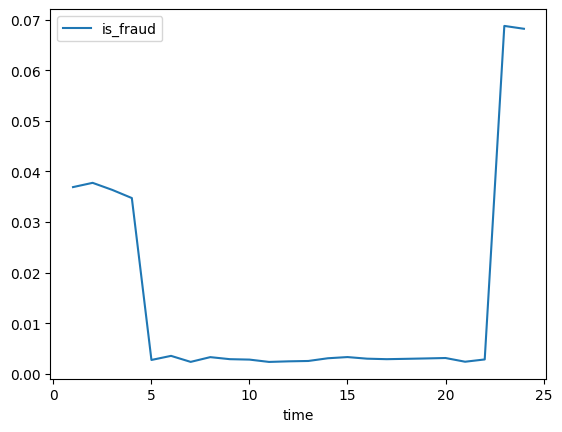

In [10]:
# line graph for time and is_fraud

train_data.groupby(['time']).agg({'is_fraud': 'mean'}).plot()

with above graph we can derive that frauds are between 10pm and 5am

In [57]:
# data = train_data.groupby('time')['is_fraud'].mean()
# # now we can use the mean of fraud cases instead of the actual time
# # train_data['new_category'] = train_data.category.map(data)
# print(data)
# train_data['averged_time'] = train_data.time.map(data) #train_data.groupby('time')['is_fraud'].mean()
# train_data.head()
# print(train_data.groupby('time')['is_fraud'].sum())
dict_time_counts = {}

for x in range(1,25):
  count = train_data[(train_data['time'] == x) & (train_data['is_fraud'] == 1)].shape[0]
  # print(val)
  dict_time_counts[x] = round((count/7506)*100)

train_data['averaged_time'] = train_data.time.map(dict_time_counts)
test_data['averaged_time'] = train_data.time.map(dict_time_counts)
# print(train_data.value_counts())
train_data['averaged_time'].head(20)
train_data['averaged_time'].head(20)

0      1
1      1
2      1
3      1
4      1
5      1
6     26
7      1
8     26
9      1
10     8
11     1
12     8
13     1
14     1
15     1
16     1
17    26
18     1
19     8
Name: averaged_time, dtype: int64

In [58]:
# now we can safely remove the time columns
train_data = train_data.drop(['time','trans_date_trans_time'],axis = 1)
test_data = test_data.drop(['time','trans_date_trans_time'],axis = 1)
train_data.head()

,id,cc_num,merchant,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,new_category,averaged_time
0,1,3597926034019603,fraud_Ruecker Group,7.19,Derrick,Flores,M,83690 Nicholas Ports Apt. 846,Oakland,TN,38060,35.2229,-89.5518,9496,Furniture conservator/restorer,1993-03-23,2642fec2e19c9e18e61fe9a88f6bc79a,1355567710,35.189455,-90.121666,0,12,1
1,2,4873783502705038,fraud_Lynch Ltd,6.32,Elizabeth,Maxwell,F,194 Goodman Fall Apt. 569,Burlington,WA,98233,48.4786,-122.3345,14871,Public house manager,1974-03-10,61cec15bdbd3db31b12f886e8e181380,1334094593,49.004316,-122.745016,0,11,1
2,3,213161869125933,fraud_Bauch-Raynor,147.59,Monica,Lane,F,3270 Scott Islands,East Andover,ME,4226,44.6084,-70.6993,190,Animal nutritionist,1970-04-17,c8fcf575540e37ce0822cd040148ff57,1361012178,44.455449,-70.809148,0,23,1
3,4,374656033243756,"fraud_Effertz, Welch and Schowalter",32.40,David,Lewis,M,1499 Michael Rue,Arlington,VA,22213,38.8954,-77.1633,207410,Mudlogger,1984-07-03,9e9cde0e0963ac746a2cc9938e171c9a,1367338456,39.476941,-77.613438,0,3,1
4,5,6011999606625827,fraud_Wilkinson LLC,29.79,Ronald,Carson,M,870 Rocha Drive,Harrington Park,NJ,7640,40.9918,-73.9800,4664,"Radiographer, diagnostic",1965-06-30,0742473d7f6261ce366b43ece063faf3,1354741679,40.863808,-74.674018,0,3,1


<ipython-input-13-b95a2c8b5ce8>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot = True,fmt = '.2f')


<Axes: >

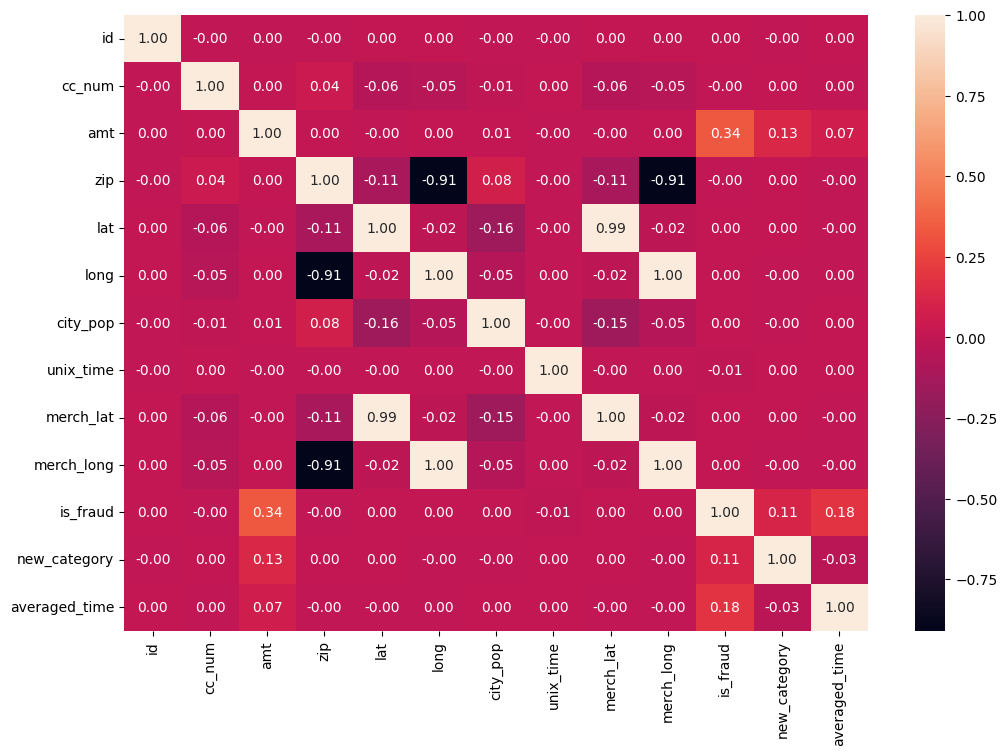

In [13]:
# checking the correaltion heatmap
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(),annot = True,fmt = '.2f')

merch_lat = lat
merch_long = long

In [59]:
# dropping merch_lat and merch_long becuase they have strong correlation with lat and long respectively
train_data = train_data.drop(['merch_lat','merch_long'], axis = 1)
test_data = test_data.drop(['merch_lat','merch_long'], axis = 1)
train_data.head(2)

,id,cc_num,merchant,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,is_fraud,new_category,averaged_time
0,1,3597926034019603,fraud_Ruecker Group,7.19,Derrick,Flores,M,83690 Nicholas Ports Apt. 846,Oakland,TN,38060,35.2229,-89.5518,9496,Furniture conservator/restorer,1993-03-23,2642fec2e19c9e18e61fe9a88f6bc79a,1355567710,0,12,1
1,2,4873783502705038,fraud_Lynch Ltd,6.32,Elizabeth,Maxwell,F,194 Goodman Fall Apt. 569,Burlington,WA,98233,48.4786,-122.3345,14871,Public house manager,1974-03-10,61cec15bdbd3db31b12f886e8e181380,1334094593,0,11,1


In [60]:
# checking the current info

train_data = train_data.drop('id',axis = 1)
test_data = test_data.drop('id',axis = 1)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523174 entries, 0 to 523173
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   cc_num         523174 non-null  int64  
 1   merchant       523174 non-null  object 
 2   amt            523174 non-null  float64
 3   first          523174 non-null  object 
 4   last           523174 non-null  object 
 5   gender         523174 non-null  object 
 6   street         523174 non-null  object 
 7   city           523174 non-null  object 
 8   state          523174 non-null  object 
 9   zip            523174 non-null  int64  
 10  lat            523174 non-null  float64
 11  long           523174 non-null  float64
 12  city_pop       523174 non-null  int64  
 13  job            523174 non-null  object 
 14  dob            523174 non-null  object 
 15  trans_num      523174 non-null  object 
 16  unix_time      523174 non-null  int64  
 17  is_fraud       523174 non-nul

In [16]:
train_data.street.value_counts()

2481 Mills Lock                        1298
4038 Smith Avenue                      1280
27479 Reeves Dale                      1271
561 Little Plain Apt. 738              1270
26544 Andrea Glen                      1269
7618 Gonzales Mission                  1266
4664 Sanchez Common Suite 930          1259
40624 Rebecca Spurs                    1258
2870 Bean Terrace Apt. 756             1257
594 Berry Lights Apt. 392              1255
29606 Martinez Views Suite 653         1252
6033 Young Track Suite 804             1252
320 Nicholson Orchard                  1250
8030 Beck Motorway                     1248
5796 Lee Coves Apt. 286                1248
7202 Jeffrey Mills                     1244
372 Jeffrey Course                     1237
1652 James Mews                        1236
47029 Jimmy Tunnel Apt. 106            1235
0925 Lang Extensions                   1234
516 Brown Parks                        1230
19838 Tonya Prairie Apt. 947           1230
854 Walker Dale Suite 488       

In [17]:

# Assuming train_data is a pandas DataFrame with columns 'state' and 'is_fraud'

# Assuming 'state' is a categorical variable
# def fun(state):
#   fraud_counts_by_state = train_data[train_data['is_fraud'] == 1].groupby(state).size().reset_index(name='fraud_count')

#   # print(fraud_counts_by_state.sort_values('fraud_count',ascending = False))
#   print(state,len(train_data[state].value_counts()))
#   plt.figure(figsize=(12, 8))
#   plt.title(state)
#   sns.barplot(x=state, y='fraud_count', data=fraud_counts_by_state)
# lis = ['state','city','zip']
# for x in lis:
#   fun(x)
# plt.show()


discarding state and city column and converting zip into total number of fraud percentage at that zip

In [61]:
# def to_percent(dataList,new_col,curr_col):
#   dict_vals = {}

#   for x in dataList:
#     count = train_data[(train_data[curr_col] == x) & (train_data['is_fraud'] == 1)].shape[0]
#     # print(val)
#     dict_vals[x] = round((count/7506)*100)

#   train_data[new_col] = train_data.time.map(dict_vals)
#   train_data = train_data.drop(curr_col,axis = 1)

# unique_zip_values = train_data['zip'].unique()
# to_percent(unique_zip_values, 'zip_average', 'zip')


def to_percent(dataList, new_col, curr_col, data, data2, product = 100):
    dict_vals = {}

    for x in dataList:
        count = data[(data[curr_col] == x) & (data['is_fraud'] == 1)].shape[0]
        fraud_counts = len(train_data[train_data.is_fraud == 1])
        dict_vals[x] = round((count / fraud_counts) * product)

    data[new_col] = data[curr_col].map(dict_vals)
    data2[new_col] = data2[curr_col].map(dict_vals)
    # data = data.drop(curr_col, axis=1)
    return data, data2

unique_zip_values = train_data['zip'].unique()
train_data, test_data = to_percent(unique_zip_values, 'zip_average', 'zip', train_data, test_data, 10000)


In [19]:
train_data.head()
train_data.zip_average.value_counts()

0     124179
11     51732
15     48203
13     42675
12     41219
16     38469
9      35652
19     30194
20     23520
17     17863
7      13831
8      12586
21     12245
5       8953
4       8458
3       5575
24      2842
28      2425
31      1480
32       658
25       415
Name: zip_average, dtype: int64

In [62]:
# dropping state and city
drops = ['state','city','street']
train_data = train_data.drop(drops,axis = 1)
test_data = test_data.drop(drops,axis = 1)

In [63]:
train_data.shape
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523174 entries, 0 to 523173
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   cc_num         523174 non-null  int64  
 1   merchant       523174 non-null  object 
 2   amt            523174 non-null  float64
 3   first          523174 non-null  object 
 4   last           523174 non-null  object 
 5   gender         523174 non-null  object 
 6   zip            523174 non-null  int64  
 7   lat            523174 non-null  float64
 8   long           523174 non-null  float64
 9   city_pop       523174 non-null  int64  
 10  job            523174 non-null  object 
 11  dob            523174 non-null  object 
 12  trans_num      523174 non-null  object 
 13  unix_time      523174 non-null  int64  
 14  is_fraud       523174 non-null  int64  
 15  new_category   523174 non-null  int64  
 16  averaged_time  523174 non-null  int64  
 17  zip_average    523174 non-nul

In [64]:
# first and last names do not have any impact so dropping them and trans_num is unique for all rows and no result can be drawn from it
drops = ['first','last','trans_num']
train_data = train_data.drop(drops, axis = 1)
test_data = test_data.drop(drops, axis = 1)

In [65]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523174 entries, 0 to 523173
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   cc_num         523174 non-null  int64  
 1   merchant       523174 non-null  object 
 2   amt            523174 non-null  float64
 3   gender         523174 non-null  object 
 4   zip            523174 non-null  int64  
 5   lat            523174 non-null  float64
 6   long           523174 non-null  float64
 7   city_pop       523174 non-null  int64  
 8   job            523174 non-null  object 
 9   dob            523174 non-null  object 
 10  unix_time      523174 non-null  int64  
 11  is_fraud       523174 non-null  int64  
 12  new_category   523174 non-null  int64  
 13  averaged_time  523174 non-null  int64  
 14  zip_average    523174 non-null  int64  
dtypes: float64(3), int64(8), object(4)
memory usage: 59.9+ MB


In [68]:
train_data = train_data.drop('cc_num', axis = 1)
test_data = test_data.drop('cc_num', axis = 1)

In [26]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523174 entries, 0 to 523173
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   cc_num          523174 non-null  int64  
 1   merchant        523174 non-null  object 
 2   amt             523174 non-null  float64
 3   gender          523174 non-null  object 
 4   zip             523174 non-null  int64  
 5   lat             523174 non-null  float64
 6   long            523174 non-null  float64
 7   city_pop        523174 non-null  int64  
 8   job             523174 non-null  object 
 9   dob             523174 non-null  object 
 10  unix_time       523174 non-null  int64  
 11  is_fraud        523174 non-null  int64  
 12  new_category    523174 non-null  int64  
 13  averaged_time   523174 non-null  int64  
 14  zip_average     523174 non-null  int64  
 15  cc_num_average  523174 non-null  int64  
dtypes: float64(3), int64(9), object(4)
memory usage: 63.9+ M

applying hot encoding to gender

In [71]:
train_data['male'] = np.where(train_data['gender'] == 'M', 1, 0)
train_data = train_data.drop('gender',axis = 1)
test_data['male'] = np.where(test_data['gender'] == 'M', 1, 0)
test_data = test_data.drop('gender',axis = 1)
train_data.head()


KeyError: ignored

In [28]:
train_data.male.value_counts()

0    286002
1    237172
Name: male, dtype: int64

<Axes: xlabel='amt'>

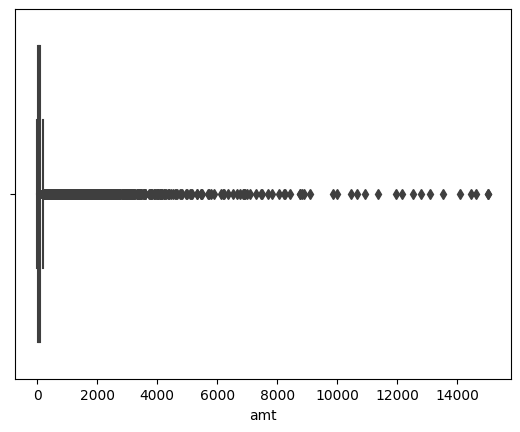

In [29]:
# checking amt's boxplot for outliers
sns.boxplot(x = train_data.amt)

# no satisfactory outcome

nothing can be derived using boxplot


In [30]:
print(len(train_data.columns))
train_data.head()

16


,cc_num,merchant,amt,zip,lat,long,city_pop,job,dob,unix_time,is_fraud,new_category,averaged_time,zip_average,cc_num_average,male
0,3597926034019603,fraud_Ruecker Group,7.19,38060,35.2229,-89.5518,9496,Furniture conservator/restorer,1993-03-23,1355567710,0,12,1,0,0,1
1,4873783502705038,fraud_Lynch Ltd,6.32,98233,48.4786,-122.3345,14871,Public house manager,1974-03-10,1334094593,0,11,1,11,11,0
2,213161869125933,fraud_Bauch-Raynor,147.59,4226,44.6084,-70.6993,190,Animal nutritionist,1970-04-17,1361012178,0,23,1,12,12,0
3,374656033243756,"fraud_Effertz, Welch and Schowalter",32.40,22213,38.8954,-77.1633,207410,Mudlogger,1984-07-03,1367338456,0,3,1,11,11,1
4,6011999606625827,fraud_Wilkinson LLC,29.79,7640,40.9918,-73.9800,4664,"Radiographer, diagnostic",1965-06-30,1354741679,0,3,1,12,12,1


looking into merchant column


In [31]:
print(len(train_data[train_data.is_fraud == 1].merchant.value_counts()))
train_data[train_data.is_fraud == 1].merchant.value_counts()

679


fraud_Rau and Sons                             49
fraud_Cormier LLC                              48
fraud_Kozey-Boehm                              48
fraud_Kilback LLC                              47
fraud_Vandervort-Funk                          47
fraud_Doyle Ltd                                47
fraud_Kuhn LLC                                 44
fraud_Padberg-Welch                            44
fraud_Terry-Huel                               43
fraud_Koepp-Witting                            42
fraud_Goyette Inc                              42
fraud_Jast Ltd                                 42
fraud_Kiehn-Emmerich                           41
fraud_McDermott-Weimann                        41
fraud_Schmeler, Bashirian and Price            41
fraud_Kerluke-Abshire                          41
fraud_Boyer PLC                                40
fraud_Moen, Reinger and Murphy                 40
fraud_Gleason-Macejkovic                       40
fraud_Hudson-Ratke                             40


679 unique merchants that are doing fraud transactions

dropping unix time column column, since we had date and time column and we have extracted the required info from that only

In [32]:
train_data = train_data.drop('unix_time',axis = 1)

converting dob into age

In [33]:
train_data['dob'] = pd.to_datetime(train_data['dob'], format='%Y-%m-%d')

# Calculate age as of November 13, 2023
reference_date = pd.to_datetime('2023-11-13')
train_data['age'] = (reference_date - train_data['dob']).astype('<m8[Y]')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523174 entries, 0 to 523173
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   cc_num          523174 non-null  int64         
 1   merchant        523174 non-null  object        
 2   amt             523174 non-null  float64       
 3   zip             523174 non-null  int64         
 4   lat             523174 non-null  float64       
 5   long            523174 non-null  float64       
 6   city_pop        523174 non-null  int64         
 7   job             523174 non-null  object        
 8   dob             523174 non-null  datetime64[ns]
 9   is_fraud        523174 non-null  int64         
 10  new_category    523174 non-null  int64         
 11  averaged_time   523174 non-null  int64         
 12  zip_average     523174 non-null  int64         
 13  cc_num_average  523174 non-null  int64         
 14  male            523174 non-null  int

doing boxplot on age to determine the outliers

51.0    227
33.0    194
36.0    192
53.0    191
47.0    188
56.0    183
32.0    176
30.0    170
62.0    167
60.0    162
37.0    153
61.0    152
27.0    139
35.0    137
57.0    135
26.0    135
49.0    135
65.0    132
59.0    129
48.0    129
39.0    128
67.0    128
58.0    127
42.0    126
55.0    123
63.0    121
66.0    120
40.0    117
52.0    114
43.0    113
50.0    109
28.0    109
46.0    108
38.0    107
54.0    106
69.0    102
44.0    100
25.0    100
24.0     95
41.0     94
29.0     92
83.0     88
68.0     85
34.0     85
74.0     84
45.0     83
70.0     82
81.0     75
77.0     75
84.0     73
23.0     73
82.0     71
64.0     68
31.0     64
22.0     58
72.0     58
89.0     54
73.0     54
95.0     48
86.0     47
71.0     45
94.0     43
75.0     41
87.0     40
96.0     40
76.0     37
78.0     35
88.0     35
90.0     34
85.0     32
92.0     31
91.0     29
80.0     28
79.0     27
97.0     25
18.0     23
93.0     23
20.0     21
19.0     16
98.0     11
Name: age, dtype: int64

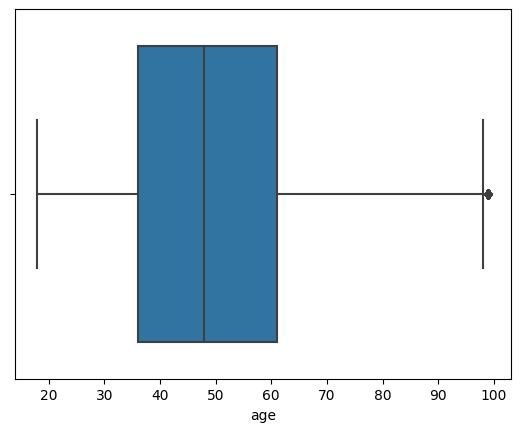

In [34]:
sns.boxplot(x = train_data.age)
train_data.age.value_counts().sort_values(ascending = False)

train_data[train_data.is_fraud == 1]['age'].value_counts()

In [35]:

# def to_percent(dataList, new_col, curr_col, data, product = 100):
#     dict_vals = {}

#     for x in dataList:
#         count = data[(data[curr_col] == x) & (data['is_fraud'] == 1)].shape[0]
#         dict_vals[x] = round((count / 7506) * product)

#     data[new_col] = data[curr_col].map(dict_vals)
#     data = data.drop(curr_col, axis=1)
#     return data

# unique_zip_values = train_data['zip'].unique()
# train_data = to_percent(unique_zip_values, 'zip_average', 'zip', train_data, 10000)

print(len(train_data[train_data.is_fraud == 1]))
# print(train_data.age.unique())
# print(train_data[train_data.is_fraud == 1].age.value_counts())
unique_age_values = train_data.age.unique()
train_data = to_percent(unique_age_values,'new_age', 'age', train_data, 1000)
print(train_data.new_age.min())
train_data.head()
train_data[train_data.is_fraud == 1].new_age.value_counts()

7506
0


17    767
18    674
16    481
15    445
14    423
11    419
13    389
26    386
25    379
23    346
22    329
20    305
10    296
5     262
30    227
9     203
24    183
6     183
12    180
4     147
19    139
8     116
7     108
3      92
2      16
1      11
Name: new_age, dtype: int64

now looking at merchant column

In [36]:
print('total merchants',len(train_data.merchant.value_counts()))
print('total merchants with frauds',len(train_data[train_data.is_fraud == 1].merchant.value_counts()))
train_data[train_data.is_fraud == 1].merchant.value_counts()

total merchants 693
total merchants with frauds 679


fraud_Rau and Sons                             49
fraud_Cormier LLC                              48
fraud_Kozey-Boehm                              48
fraud_Kilback LLC                              47
fraud_Vandervort-Funk                          47
fraud_Doyle Ltd                                47
fraud_Kuhn LLC                                 44
fraud_Padberg-Welch                            44
fraud_Terry-Huel                               43
fraud_Koepp-Witting                            42
fraud_Goyette Inc                              42
fraud_Jast Ltd                                 42
fraud_Kiehn-Emmerich                           41
fraud_McDermott-Weimann                        41
fraud_Schmeler, Bashirian and Price            41
fraud_Kerluke-Abshire                          41
fraud_Boyer PLC                                40
fraud_Moen, Reinger and Murphy                 40
fraud_Gleason-Macejkovic                       40
fraud_Hudson-Ratke                             40


applying to_percent function on merchant column

 ***UPDATE
HANDLED THIS ISSUE***
I NEED TO DO ONE MANIPULATION WITH TO_PERCENT FUNCTION, IT IS GIVING PERCENTAGE VALUES TO ALL UNIQUE VALUES IN THE LIST, BUT WHAT IF THERE IS SOME VALUE JISKE SATH FRAUD HI NHI HUA OR USKA OCCURENCE BHOT ZYADA H TO US CASE ME USKA PERCENTAGE TO KAAFI HIGH CHLA JAAYEGA, INSTEAD OF THAT VAHA PR SBHI COUNTS KA MEAN DAAL DENA CHAHIE


In [37]:
unique_merchant_values = train_data.merchant.unique()
train_data = to_percent(unique_merchant_values,'new_merchant', 'merchant', train_data,1000)
print(train_data.merchant.min())
print(train_data.merchant.max())
train_data.head(2)

fraud_Abbott-Rogahn
fraud_Zulauf LLC


,cc_num,merchant,amt,zip,lat,long,city_pop,job,dob,is_fraud,new_category,averaged_time,zip_average,cc_num_average,male,age,new_age,new_merchant
0,3597926034019603,fraud_Ruecker Group,7.19,38060,35.2229,-89.5518,9496,Furniture conservator/restorer,1993-03-23,0,12,1,0,0,1,30.0,23,2
1,4873783502705038,fraud_Lynch Ltd,6.32,98233,48.4786,-122.3345,14871,Public house manager,1974-03-10,0,11,1,11,11,0,49.0,18,2


now we can remove dob and merchant column safely
cc_num has already been handled so dropping it now
dropping zip also

In [38]:
drops = ['merchant','dob','cc_num','zip']
train_data = train_data.drop(drops, axis = 1)
print('safely dropped ', drops)

safely dropped  ['merchant', 'dob', 'cc_num', 'zip']


means we can directly apply to_percent function

In [39]:

print(train_data.lat.min())
print(train_data['lat'].max())
print(train_data['long'].min())
print(train_data['long'].max())
train_data.head()

20.0271
66.6933
-165.6723
-67.9503


,amt,lat,long,city_pop,job,is_fraud,new_category,averaged_time,zip_average,cc_num_average,male,age,new_age,new_merchant
0,7.19,35.2229,-89.5518,9496,Furniture conservator/restorer,0,12,1,0,0,1,30.0,23,2
1,6.32,48.4786,-122.3345,14871,Public house manager,0,11,1,11,11,0,49.0,18,2
2,147.59,44.6084,-70.6993,190,Animal nutritionist,0,23,1,12,12,0,53.0,25,4
3,32.40,38.8954,-77.1633,207410,Mudlogger,0,3,1,11,11,1,39.0,17,1
4,29.79,40.9918,-73.9800,4664,"Radiographer, diagnostic",0,3,1,12,12,1,58.0,17,1


no need to manipulate latitude and magnitude

In [40]:
train_data.averaged_time.value_counts()

1     397785
8      51941
26     28088
25     27924
9      17436
Name: averaged_time, dtype: int64

now exploring job column

In [41]:

print(len(train_data.job.value_counts()))
print(train_data.job.value_counts())
# print(train_data[train_data['is_fraud'] == 1].job.value_counts())
train_data.job.head(10)
# unique_job_values = train_dta['job'].unique()
unique_job_values = train_data['job'].unique()
train_data = to_percent(unique_job_values,'new_job','job',train_data,10000)
train_data.head()

494
Film/video editor                                              4011
Exhibition designer                                            3780
Naval architect                                                3561
Surveyor, land/geomatics                                       3542
Materials engineer                                             3388
Designer, ceramics/pottery                                     3224
Systems developer                                              3161
Financial adviser                                              3108
IT trainer                                                     3076
Environmental consultant                                       3010
Chartered public finance accountant                            2950
Scientist, audiological                                        2895
Chief Executive Officer                                        2850
Copywriter, advertising                                        2838
Podiatrist                                  

,amt,lat,long,city_pop,job,is_fraud,new_category,averaged_time,zip_average,cc_num_average,male,age,new_age,new_merchant,new_job
0,7.19,35.2229,-89.5518,9496,Furniture conservator/restorer,0,12,1,0,0,1,30.0,23,2,0
1,6.32,48.4786,-122.3345,14871,Public house manager,0,11,1,11,11,0,49.0,18,2,11
2,147.59,44.6084,-70.6993,190,Animal nutritionist,0,23,1,12,12,0,53.0,25,4,28
3,32.40,38.8954,-77.1633,207410,Mudlogger,0,3,1,11,11,1,39.0,17,1,11
4,29.79,40.9918,-73.9800,4664,"Radiographer, diagnostic",0,3,1,12,12,1,58.0,17,1,28


In [42]:
print(train_data.new_job.min())
print(train_data.new_job.max())

0
83


In [43]:
# removing the job column


drops = ['job']
train_data = train_data.drop(drops, axis = 1)

In [44]:
train_data.head()
print(train_data.city_pop.min())
print(train_data.city_pop.max())

23
2906700


visualizing the city_pop column

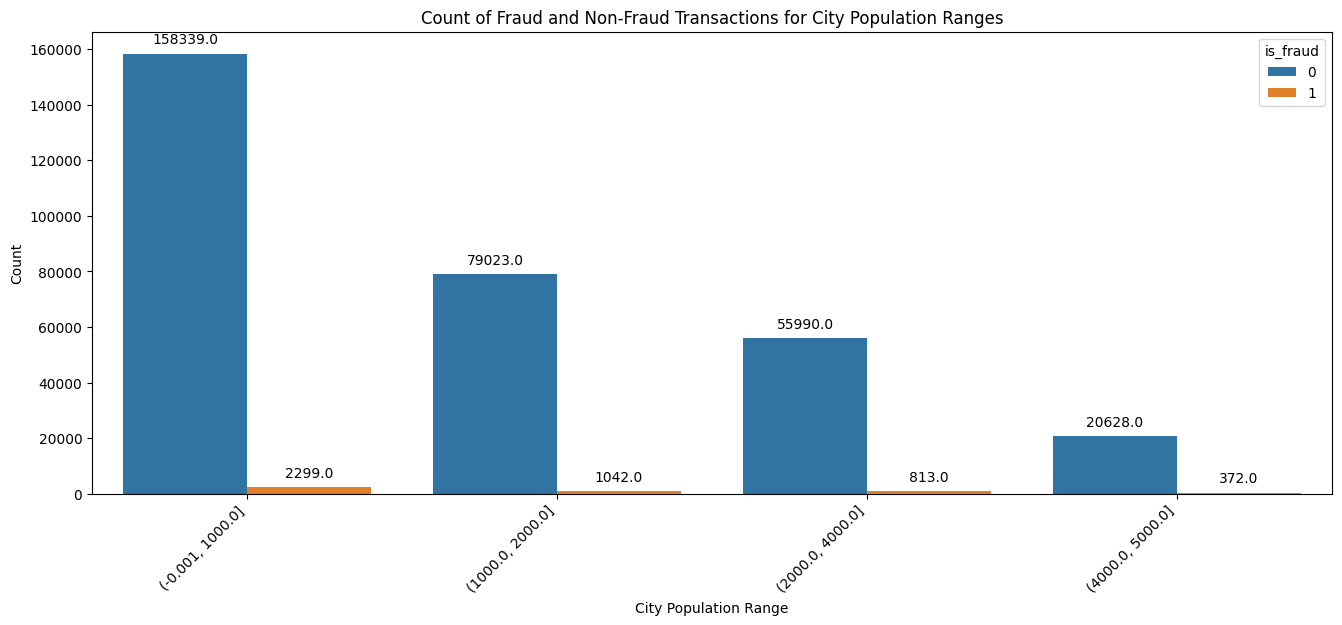

In [45]:

# Assuming your DataFrame is named 'train_data'
plt.figure(figsize=(16, 6))

# Increase the number of bins for a more granular view
bins = [0,1000,2000,4000, 5000] #, 10000, 20000, 30000, 40000, 50000, 75000, 100000, 150000, 200000, 250000, 300000, 400000, 500000, 750000, 1000000, 1500000, 2000000, 2500000,300000]

# Bin the city_pop variable
train_data['city_pop_range'] = pd.cut(train_data['city_pop'], bins=bins, include_lowest=True)

# Create a bar plot
ax = sns.countplot(x='city_pop_range', hue='is_fraud', data=train_data)
plt.title('Count of Fraud and Non-Fraud Transactions for City Population Ranges')
plt.xlabel('City Population Range')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add count annotations above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


there is high chance of fraud in cities with less population
below 1k - 2300
1k - 2k - 1042
2k - 4k - 813
4k - 5k - 372




In [46]:
train_data.head()

,amt,lat,long,city_pop,is_fraud,new_category,averaged_time,zip_average,cc_num_average,male,age,new_age,new_merchant,new_job,city_pop_range
0,7.19,35.2229,-89.5518,9496,0,12,1,0,0,1,30.0,23,2,0,NaN
1,6.32,48.4786,-122.3345,14871,0,11,1,11,11,0,49.0,18,2,11,NaN
2,147.59,44.6084,-70.6993,190,0,23,1,12,12,0,53.0,25,4,28,"(-0.001, 1000.0]"
3,32.40,38.8954,-77.1633,207410,0,3,1,11,11,1,39.0,17,1,11,NaN
4,29.79,40.9918,-73.9800,4664,0,3,1,12,12,1,58.0,17,1,28,"(4000.0, 5000.0]"
